<a href="https://colab.research.google.com/github/Chan0226/Neural-Network/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 텐서플로 프로그램 : 퍼셉트론 학습
import tensorflow as tf

In [ ]:
# or 데이터 구축
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

In [ ]:
# 가중치 초기화
# 일반적인 딥러닝 프로그램에서는 Variable을 사용해야한다
# 텐서에서 Variable은 신경망의 가중치에 해당
# 신경망을 학습할때는 그레이디언트 정보를 구하고 가중치를 갱신  --> Variable
# 그레이디언트 = 미분한 값 = 기울기

w = tf.Variable( tf.random.uniform([2,1],-0.5,0.5) )
b = tf.Variable(tf.zeros([1]))
w,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.43559253],
        [0.06750429]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [ ]:
# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
# 전방계산식   accuracy 
def forward():
  s = tf.add(tf.matmul(x,w),b)
  o = tf.tanh(s)          # 활성함수를 tanh 를 사용 = 계단함수는 불연속점이 있어서 미분이 어려움
  return o

In [ ]:
# 손실 함수 정의
def loss():
  o = forward()
  return tf.reduce_mean((y-o)**2)

In [ ]:
# 500세대 까지 학습(100세대마다 출력)
for i in range(500):
  opt.minimize(loss, var_list=[w,b])
  if(i %100 == 0):
    print("loss at epoch",i,"=",loss().numpy()) 

loss at epoch 0 = 0.5538456
loss at epoch 100 = 0.08559162
loss at epoch 200 = 0.0407632
loss at epoch 300 = 0.025939506
loss at epoch 400 = 0.018799108


In [ ]:
# 학습한 데이터를 퍼셉트론으로 예측
o = forward()
print(o)

tf.Tensor(
[[-0.8175893 ]
 [ 0.88708746]
 [ 0.8871779 ]
 [ 0.9992823 ]], shape=(4, 1), dtype=float32)


In [ ]:
# 퍼셉트론을 이용한 신경망의 문제점
# 신경망의 동작을 직접 코딩 --> 케라스
# 케라스는 새로운 디자인 패턴을 만들었음.  
# 프로그램의 방법론 또는 코딩 규칙
# model.add(Dense(노드 개수, 활성 함수....))

In [ ]:
# 케라스 주요 클래스
# models : 
# layers : 다양한 층
# optimizers : 다양한 옵티마이저 제공

In [ ]:
# 케라스 프로그램 : 퍼셉트론 학습
from tensorflow.keras.models import Sequential # 층을 한줄로 쌓는데 사용
from tensorflow.keras.layers import Dense  #인접한 두개의 층이 완전연결된 경우
from tensorflow.keras.optimizers import SGD

In [ ]:
# 데이터 구축 -> 신경망 구조 설계 ->학습 ->예측    ---> 케라스의 디자인 패턴

In [ ]:
# or 데이터 구축
x = [[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y = [[-1],[1],[1],[1]]

# 신경망 구조 설계
n_input = 2
n_output = 1
perceptron =  Sequential()
perceptron.add(Dense(units=n_output, input_shape=(n_input,),
                     activation = 'tanh', kernel_initializer='random_uniform',
                     bias_initializer='zero'                   
                     ))

#학습
perceptron.compile(loss = 'mse', optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)  # verbose=2 --> epochs가 2세대 마다 한번씩 출력

#예측
res = perceptron.predict(x)
print(res)

In [ ]:
 # 케라스 프로그램 : 다층 퍼셉트론 학습 MNIST 인식

In [ ]:
# 데이터는 1차원 백터로 표현한다.
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [ ]:
n_input=784
n_hidden=1024
n_output=10

In [ ]:
mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

In [ ]:
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

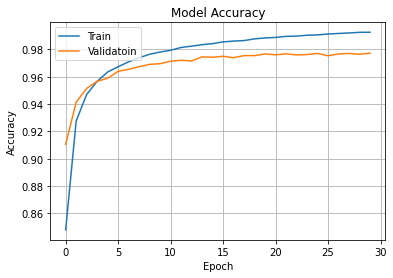

In [ ]:
import matplotlib.pyplot as plt
#accuracy 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Validatoin'], loc = "upper left")
plt.grid()
plt.show()

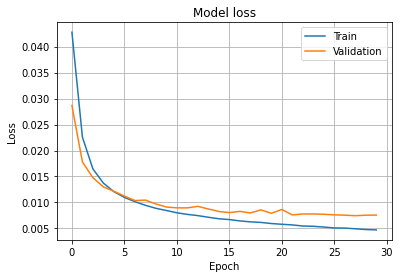

In [ ]:
#손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()